<a href="https://colab.research.google.com/github/munsejin/Study2/blob/master/DL005_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 데이터 셋을 ANN에 적용하기

## 데이터 로드

- MNIST 데이터는 케라스를 이용해 불러올 수 있음

- 불러온 이미지 데이터를 X로, 레이블 (0~9)을 Y_class에 저장
- 학습 데이터 : X_train, Y_train
- 테스트 데이터 : X_test, Y_test


In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" %(X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" %(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


## 데이터 분석

### 0번째 훈련 셋 데이터 출력 (이미지)

- cmap=‘Greys’ : 흑백으로 출력

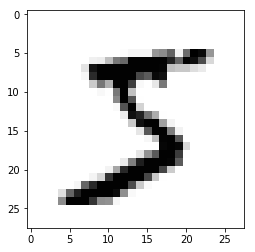

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

### 0번째 훈련 셋 데이터의 픽셀 값 출력

- 각 숫자 이미지는 28x28 크기의 총 784개의 픽셀로 구성
- 픽셀을 밝기 정도에 따라 0(흰색)~255(검정색)까지의 숫자로 구성되어 있음.

In [ ]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### 각 픽셀 값을 딥러닝의 속성으로 넣기 위해 2차원 배열(28x28)로 된 이미지 데이트를 1차원 배열 (784)로 변환해야 함

In [ ]:
# 차원 변환
X_train = X_train.reshape(X_train.shape[0], 784)

import sys
for x in X_train[0]:
    sys.stdout.write('%d\t' %x)

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0

### Keras는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보이므로 0-255 범위의 값을 0-1 범위로 변환 (정규화 (normalization))

In [ ]:
X_train = X_train.astype("float32") / 255

import sys
for x in X_train[0]:
    sys.stdout.write('%.3f\t' %x)

0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.012	0.071	0.071	0.071	0.494	0.533	0.686	0.102	0.651	1.000	0.969	0.498	0.000	0.000	0.00

### 테스트 데이터 셋도 동일하게 변환

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255

###  레이블 값 출력

In [ ]:
print("class : %d " % (Y_train[0]))

class : 5 


### 분류 문제를 해결하기 위해서는 레이블(0~9)을 원-핫 인코딩 방식을 적용해야 함.

In [ ]:
from keras.utils import np_utils

# 원핫 인코딩의 바이트 수를 10으로 설정 (총 10 종류의 레이블이므로)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 기본 프레임 만들기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 설정
model = Sequential()
# 전체 픽셀 수를 입력을 받음
model.add(Dense(512, input_dim=784, activation="relu"))
# 0-9를 분류해야 하므로 출력을 10으로 설정
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0)

In [ ]:
# 모델 평가
print("\n Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

### 베스트 모델 저장 및 학습 중단 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

MODEL_DIR = "/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, 
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.08617, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/01-0.0862.hdf5

Epoch 00002: val_loss did not improve from 0.08617

Epoch 00003: val_loss did not improve from 0.08617

Epoch 00004: val_loss did not improve from 0.08617

Epoch 00005: val_loss improved from 0.08617 to 0.07768, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/05-0.0777.hdf5

Epoch 00006: val_loss improved from 0.07768 to 0.07759, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/06-0.0776.hdf5

Epoch 00007: val_loss did not improve from 0.07759

Epoch 00008: val_loss did not improve from 0.07759

Epoch 00009: val_loss did not improve from 0.07759

Epoch 00010: val_loss did not improve from 0.07759

Epoch 00011: val_loss did not improve from 0.07759

Epoch 00012: val_loss did not improve from 0.07759

Epoch 00013: val_loss did not improve from 0.07759

Epoch 00014: val_loss did not improve from 0.07759

Epoch 00015: val_loss did 

- epochs를 30으로 설정했지만 19번째에서 학습을 미리 끝냄
- 저장된 모델을 확인해보면 9번째 에포크가 베스트 모델임을 알 수 있음

In [ ]:
print("\n Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 53us/step

 Accuracy : 0.9831


## 학습 오차 시각화



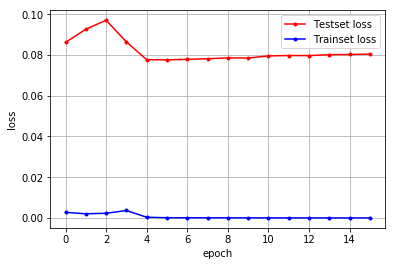

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

### 베스트 모델을 이용하여 평가하기

In [ ]:
from keras.models import load_model

model_best = load_model("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/06-0.0776.hdf5")

In [ ]:
print("\n Accuracy : %.4f" % (model_best.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 71us/step

 Accuracy : 0.9832


# CNN (Convolution Neural Network)

In [ ]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 테스트를 위해 데이터의 개수를 줄임 (원 훈련데이터 6000, 테스트 데이터 1000)
X_train = X_train[:1000, :]
Y_train = Y_train[:1000,]
X_test = X_test[:300, :]
Y_test = Y_test[:300,]

In [ ]:
# 컨볼루션 층은 2차원 데이터를 사용하므로 데이터를 변환 (28 x 28)
# 마지막 인자 1은 색상으로 흑백 (칼라는 3 -> RGB)
# 분류 문제이므로 원핫 인코딩
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

### 모델 생성

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
# (필터의 수, 필터 커널의 크기, 입력되는 값의 크기와 색상)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
# Dense는 1차원 배열을 사용하므로 2차원 배열을 1차원 배열로 변환
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________


### 컴파일 및 실행

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

MODEL_DIR = "/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/"

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.88798, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/01-0.8880.hdf5

Epoch 00002: val_loss improved from 0.88798 to 0.56199, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/02-0.5620.hdf5

Epoch 00003: val_loss improved from 0.56199 to 0.40520, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/03-0.4052.hdf5

Epoch 00004: val_loss improved from 0.40520 to 0.37196, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/04-0.3720.hdf5

Epoch 00005: val_loss improved from 0.37196 to 0.29926, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/05-0.2993.hdf5

Epoch 00006: val_loss did not improve from 0.29926

Epoch 00007: val_loss did not improve from 0.29926

Epoch 00008: val_loss did not improve from 0.29926

Epoch 00009: val_loss did not improve from 0.29926

Epoch 00010: val_loss did not improve from 0.29926

Epoch 00011: val_loss did not improve from 0.29926

Epoch 00012: val

In [ ]:
model_best = load_model("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/05-0.2993.hdf5")

In [ ]:
print("\n Accuracy : %.4f" % (model_best.evaluate(X_test, Y_test)[1]))

300/300 [==============================] - 0s 2ms/step

 Accuracy : 0.9333


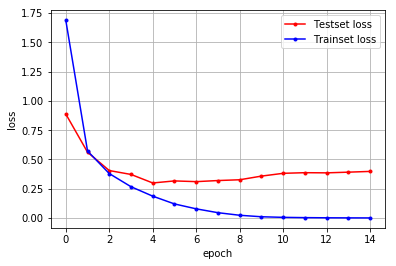

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## MaxPooling 층

In [ ]:
model = Sequential()
# (필터의 수, 필터 커널의 크기, 입력되는 값의 크기와 색상)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
# Dense는 1차원 배열을 사용하므로 2차원 배열을 1차원 배열로 변환
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

W0715 14:12:45.789976 140583654909824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

MODEL_DIR = "/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/"

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.40382, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/01-1.4038.hdf5

Epoch 00002: val_loss improved from 1.40382 to 0.70081, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/02-0.7008.hdf5

Epoch 00003: val_loss improved from 0.70081 to 0.54676, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/03-0.5468.hdf5

Epoch 00004: val_loss improved from 0.54676 to 0.44146, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/04-0.4415.hdf5

Epoch 00005: val_loss improved from 0.44146 to 0.33125, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/05-0.3313.hdf5

Epoch 00006: val_loss improved from 0.33125 to 0.28489, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/06-0.2849.hdf5

Epoch 00007: val_loss improved from 0.28489 to 0.26809, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/07-0.2681.hdf5

Epoch 00008: val_loss improved from 0.26809 to 0.24667, sa

In [ ]:
model_best = load_model("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/10-0.2228.hdf5")

In [ ]:
print("\n Accuracy : %.4f" % (model_best.evaluate(X_test, Y_test)[1]))

300/300 [==============================] - 1s 2ms/step

 Accuracy : 0.9333


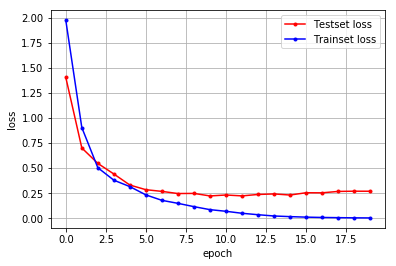

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

- MaxPooling을 사용하니 과대적합이 감소

## Dropout 층

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

MODEL_DIR = "/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/"

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.63919, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/01-1.6392.hdf5

Epoch 00002: val_loss improved from 1.63919 to 0.80535, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/02-0.8054.hdf5

Epoch 00003: val_loss improved from 0.80535 to 0.58133, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/03-0.5813.hdf5

Epoch 00004: val_loss improved from 0.58133 to 0.48713, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/04-0.4871.hdf5

Epoch 00005: val_loss improved from 0.48713 to 0.42004, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/05-0.4200.hdf5

Epoch 00006: val_loss improved from 0.42004 to 0.33855, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/06-0.3385.hdf5

Epoch 00007: val_loss improved from 0.33855 to 0.29271, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/07-0.2927.hdf5

Epoch 00008: val_loss improved from 0.29271 to 0.27818, sa

In [ ]:
model_best = load_model("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/19-0.1960.hdf5")

In [ ]:
print("\n Accuracy : %.4f" % (model_best.evaluate(X_test, Y_test)[1]))

300/300 [==============================] - 1s 3ms/step

 Accuracy : 0.9433


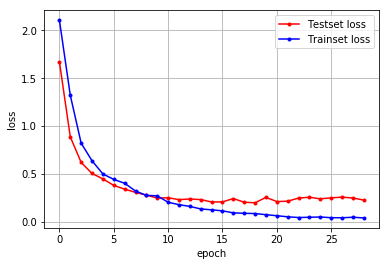

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

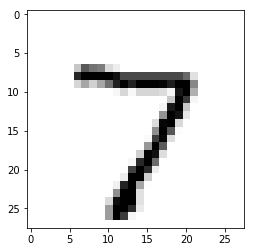

The Answer is  [7]


In [ ]:
n = 0
plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(X_test[n].reshape((1, 28, 28, 1))))

## 잘못 예측된 사례 보기

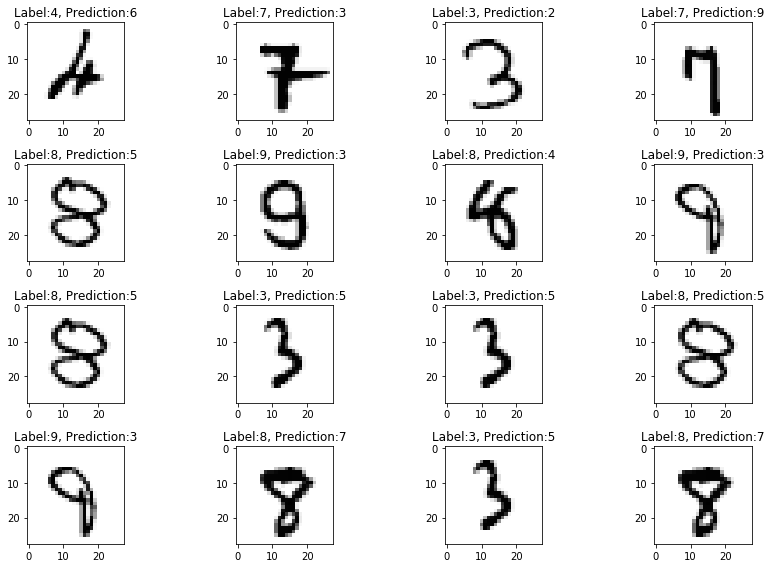

In [ ]:
import random

predicted_result = model.predict(X_test)

# 최대값에 해당하는 인덱스 반환
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(Y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    # 예측결과와 원래 라벨 값이 다르다면
    if predicted_labels[n] != test_labels[n]:
        # 인덱스를 저장
        wrong_result.append(n)

# 틀린 예측 중에서 랜덤으로 16개를 선택
samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()